In [2]:
import time
#Ignore the next statement -- it is just to estimate how long the exercise takes
start = time.perf_counter()

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_predict, validation_curve, cross_val_score, StratifiedShuffleSplit
from sklearn.inspection import permutation_importance

In [5]:
np.random.seed(903967645)

In [6]:
default_payment_dataset = pd.read_csv('../data/default_of_credit_card_clients.csv', header=1)
print(default_payment_dataset.info())
default_payment_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Check shape of dataset and for null data
print(default_payment_dataset.shape)
default_payment_dataset.isna().any().any()

(30000, 25)


False

In [8]:
print(default_payment_dataset.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [9]:
# Separate features and target
train_X = default_payment_dataset.drop(columns=['ID', 'default payment next month'])
train_y = default_payment_dataset['default payment next month']

# Normalize the feature data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(train_X)

train_X = pd.DataFrame(X_scaled, columns=train_X.columns)

In [10]:
%%time
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_X, train_y):
    strat_train_set = train_X.iloc[train_index]
    strat_test_set = train_X.iloc[test_index]
    strat_train_labels = train_y.iloc[train_index]
    strat_test_labels = train_y.iloc[test_index]

train_X = strat_train_set
test_X = strat_test_set
train_y = strat_train_labels
test_y = strat_test_labels

CPU times: user 6.5 ms, sys: 1.96 ms, total: 8.46 ms
Wall time: 8.94 ms


In [11]:
print(test_X)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
6907    0.040404  0.0   0.333333  0.666667  0.431034    0.1    0.1    0.1   
24575   0.141414  0.0   0.166667  0.333333  0.172414    0.1    0.1    0.0   
26766   0.040404  0.0   0.333333  0.666667  0.068966    0.2    0.2    0.2   
2156    0.282828  1.0   0.166667  0.666667  0.068966    0.2    0.2    0.2   
3179    0.494949  1.0   0.333333  0.333333  0.103448    0.0    0.0    0.0   
...          ...  ...        ...       ...       ...    ...    ...    ...   
8836    0.141414  1.0   0.833333  0.666667  0.103448    0.0    0.0    0.1   
1259    0.040404  0.0   0.166667  0.666667  0.051724    0.4    0.4    0.2   
27309   0.212121  0.0   0.166667  0.666667  0.224138    0.2    0.2    0.1   
29583   0.111111  0.0   0.166667  0.666667  0.086207    0.1    0.1    0.1   
24399   0.191919  0.0   0.500000  0.666667  0.206897    0.0    0.0    0.0   

       PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
690

In [12]:
%%time
# Instantiate KNN Classifier Model 
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)

# Train KNN on training data
knn.fit(train_X, train_y)
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
CPU times: user 2.56 ms, sys: 1.28 ms, total: 3.84 ms
Wall time: 3.23 ms


In [13]:
%%time
# Evaluate on training data
train_predictions = knn.predict(train_X)
train_accuracy = accuracy_score(train_y, train_predictions)
train_roc_auc = roc_auc_score(train_y, train_predictions)
train_precision = precision_score(train_y, train_predictions)
train_recall = recall_score(train_y, train_predictions)
train_f1 = f1_score(train_y, train_predictions)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
train_report = classification_report(train_y, train_predictions)
print(train_report)

# Write to a text file
with open('../results/credit-knn/training_metrics_report.txt', 'w') as file:
    file.write("Training Accuracy: " + str(train_accuracy) + "\n")
    file.write("Training ROC AUC Score: " + str(train_roc_auc) + "\n")
    file.write("Training Precision: " + str(train_precision) + "\n")
    file.write("Training Recall: " + str(train_recall) + "\n")
    file.write("Training F1 Score: " + str(train_f1) + "\n")
    file.write("\nClassification Report:\n")
    file.write(train_report + "\n")

Training Accuracy: 0.8413333333333334
Training ROC AUC Score: 0.7048817007598237
Training Precision: 0.7217134416543575
Training Recall: 0.4601619890751554
Training F1 Score: 0.5619967793880838
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     18691
           1       0.72      0.46      0.56      5309

    accuracy                           0.84     24000
   macro avg       0.79      0.70      0.73     24000
weighted avg       0.83      0.84      0.83     24000

CPU times: user 4.49 s, sys: 948 ms, total: 5.43 s
Wall time: 709 ms


In [14]:
%%time
# Evaluate on testing data
test_predictions = knn.predict(test_X)
test_accuracy = accuracy_score(test_y, test_predictions)
test_roc_auc = roc_auc_score(test_y, test_predictions)
test_precision = precision_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions)
test_f1 = f1_score(test_y, test_predictions)

print("Testing Accuracy:", test_accuracy)
print("Testing ROC AUC Score:", test_roc_auc)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)
test_report = classification_report(test_y, test_predictions)
print(test_report)

# Write to a text file
with open('../results/credit-knn/testing_metrics_report.txt', 'w') as file:
    file.write("Testing Accuracy: " + str(test_accuracy) + "\n")
    file.write("Testing ROC AUC Score: " + str(test_roc_auc) + "\n")
    file.write("Testing Precision: " + str(test_precision) + "\n")
    file.write("Testing Recall: " + str(test_recall) + "\n")
    file.write("Testing F1 Score: " + str(test_f1) + "\n")
    file.write("\nClassification Report:\n")
    file.write(test_report + "\n")

Testing Accuracy: 0.795
Testing ROC AUC Score: 0.6366414769319687
Testing Precision: 0.5578069129916567
Testing Recall: 0.35267520723436324
Testing F1 Score: 0.43213296398891965
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.56      0.35      0.43      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.65      6000
weighted avg       0.77      0.80      0.78      6000

CPU times: user 1.12 s, sys: 445 ms, total: 1.56 s
Wall time: 177 ms


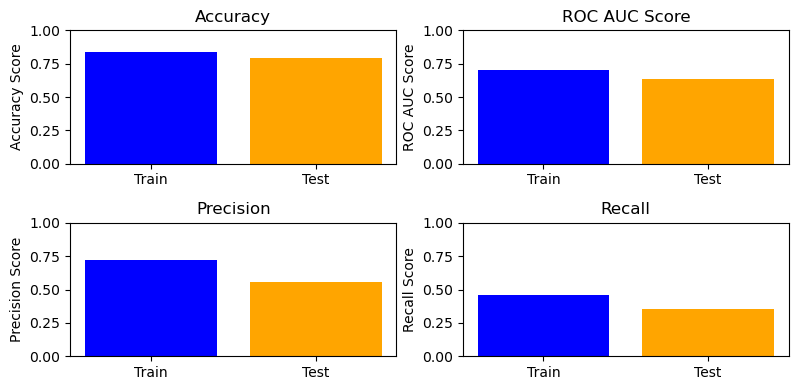

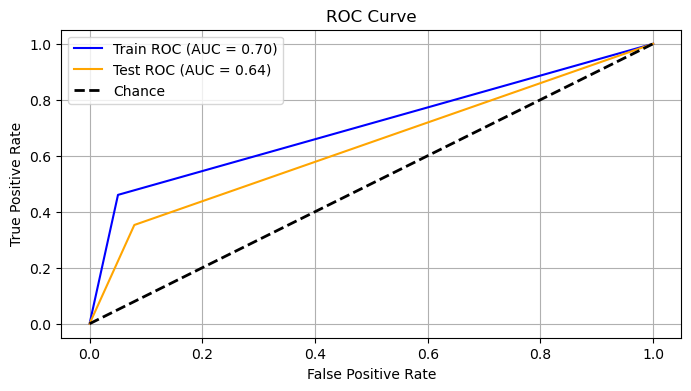

CPU times: user 1.14 s, sys: 400 ms, total: 1.54 s
Wall time: 301 ms


In [15]:
%%time
fig, ax = plt.subplots(2, 2, figsize=(8, 4))

# Accuracy
ax[0, 0].bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylim([0, 1])
ax[0, 0].set_ylabel('Accuracy Score')

# ROC AUC Score
ax[0, 1].bar(['Train', 'Test'], [train_roc_auc, test_roc_auc], color=['blue', 'orange'])
ax[0, 1].set_title('ROC AUC Score')
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_ylabel('ROC AUC Score')

# Precision
ax[1, 0].bar(['Train', 'Test'], [train_precision, test_precision], color=['blue', 'orange'])
ax[1, 0].set_title('Precision')
ax[1, 0].set_ylim([0, 1])
ax[1, 0].set_ylabel('Precision Score')

# Recall
ax[1, 1].bar(['Train', 'Test'], [train_recall, test_recall], color=['blue', 'orange'])
ax[1, 1].set_title('Recall')
ax[1, 1].set_ylim([0, 1])
ax[1, 1].set_ylabel('Recall Score')

plt.tight_layout()
fig.savefig('../images/credit-knn/metrics-comparison.png')
plt.show()

# Plotting  ROC Curves
train_fpr, train_tpr, _ = roc_curve(train_y, train_predictions)
test_fpr, test_tpr, _ = roc_curve(test_y, test_predictions)

plt.figure(figsize=(8, 4))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {auc(train_fpr, train_tpr):.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {auc(test_fpr, test_tpr):.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig('../images/credit-knn/roc-curve-fpr-tpr')
plt.show()

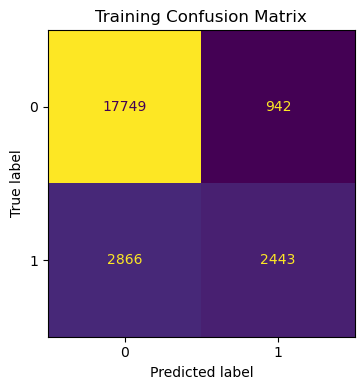

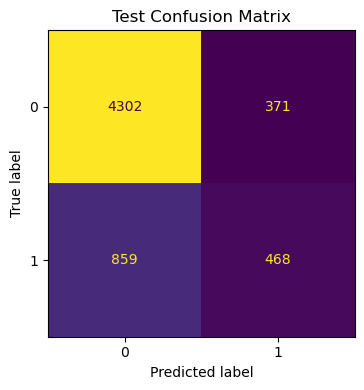

CPU times: user 376 ms, sys: 11 ms, total: 387 ms
Wall time: 130 ms


In [16]:
%%time
# Plot and save Training Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 4))
train_cm = confusion_matrix(train_y, train_predictions)
ConfusionMatrixDisplay(train_cm).plot(ax=ax, colorbar=False)
ax.set_title("Training Confusion Matrix")
plt.tight_layout()
plt.savefig('../images/credit-knn/training-cm.png')
plt.show()

# Plot and save Test Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 4))
test_cm = confusion_matrix(test_y, test_predictions)
ConfusionMatrixDisplay(test_cm).plot(ax=ax, colorbar=False)
ax.set_title('Test Confusion Matrix')
plt.tight_layout()
plt.savefig('../images/credit-knn/testing-cm.png')
plt.show()

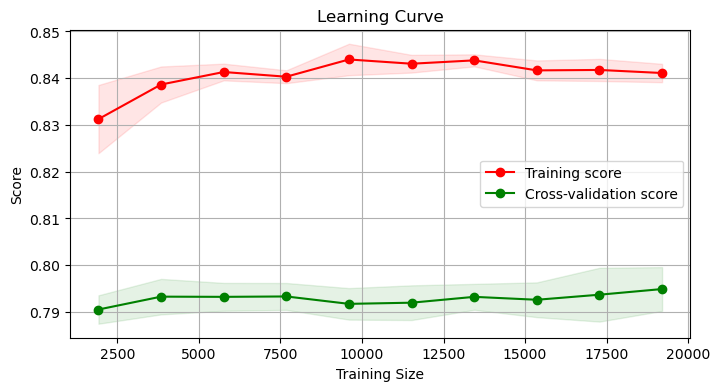

CPU times: user 1min 29s, sys: 40.5 s, total: 2min 9s
Wall time: 15.1 s


In [17]:
%%time
train_sizes, train_scores, test_scores = learning_curve(knn, train_X, train_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('../images/credit-knn/learning-curve-training-size.png')
plt.show()

Shape of train_X: (24000, 23)
Shape of y: (24000,)


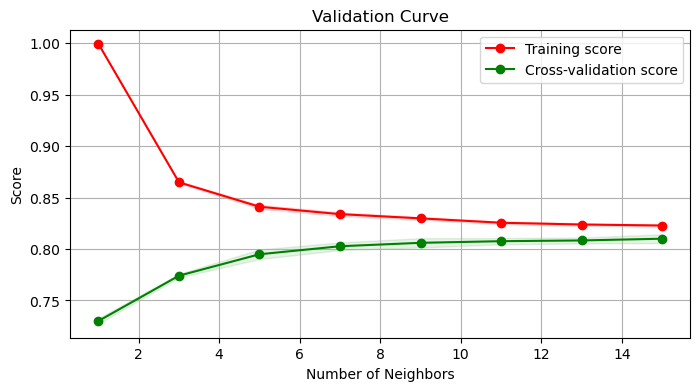

CPU times: user 267 ms, sys: 979 ms, total: 1.25 s
Wall time: 9.24 s


In [18]:
%%time
# Check the shape of train_X and y
print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of y: {train_y.shape}')

# Ensure train_X and y have the same number of samples
assert train_X.shape[0] == train_y.shape[0], "Mismatch in number of samples between train_X and y"

param_range = [1, 3, 5, 7, 9, 11, 13, 15]  # Example range for number of neighbors
train_scores, test_scores = validation_curve(KNeighborsClassifier(), train_X, train_y, param_name="n_neighbors", param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color='g', label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Validation Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('../images/credit-knn/validation-curve-number-of-neighbors.png')
plt.show()

In [19]:
%%time
# Perform 10-fold cross-validation
cv_scores = cross_val_score(knn, train_X, train_y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("mean cross-validation score:", cv_scores.mean())

# Write cross-validation scores to a text file
with open('../results/credit-knn/cross_validation_scores.txt', 'w') as file:
    file.write("Cross-validation scores: " + np.array2string(cv_scores) + "\n")
    file.write("Mean cross-validation score: " + str(cv_scores.mean()) + "\n")

Cross-validation scores: [0.78625    0.79416667 0.80708333 0.78083333 0.78416667 0.79083333
 0.79625    0.80083333 0.79416667 0.78791667]
mean cross-validation score: 0.79225
CPU times: user 4.77 s, sys: 2.67 s, total: 7.45 s
Wall time: 849 ms


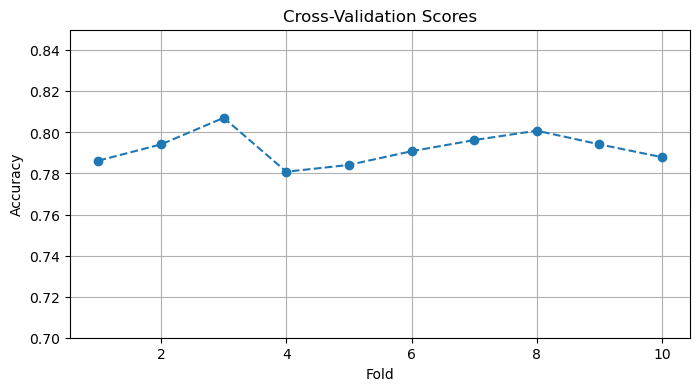

In [20]:
# Plot cross-validation scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.7, .85])
plt.grid(True)
plt.savefig('../images/credit-knn/cross-validation-scores.png')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     18691
           1       0.55      0.34      0.42      5309

    accuracy                           0.79     24000
   macro avg       0.69      0.63      0.65     24000
weighted avg       0.77      0.79      0.77     24000



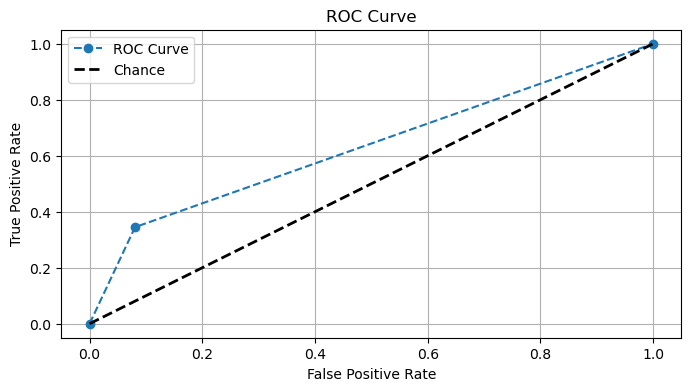

CPU times: user 4.98 s, sys: 2.45 s, total: 7.43 s
Wall time: 897 ms


In [21]:
%%time
y_pred = cross_val_predict(knn, train_X, train_y, cv=10)

report = classification_report(train_y, y_pred)
print(report)

with open('../results/credit-knn/classification_report.txt', 'w') as file:
    file.write(report)

fpr, tpr, thresholds = roc_curve(train_y, y_pred, pos_label=1)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, marker='o', linestyle='--', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig('../images/credit-knn/roc-curve-fpr.png')
plt.show()

In [22]:
%%time
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(train_X, train_y)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Write the best parameters and best score to a text file
with open('../results/credit-knn/grid_search_results.txt', 'w') as file:
    file.write("Best parameters found: " + str(grid_search.best_params_) + "\n")
    file.write("Best cross-validation score: " + str(grid_search.best_score_) + "\n")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score:  0.8100416666666668
CPU times: user 645 ms, sys: 250 ms, total: 895 ms
Wall time: 16.7 s


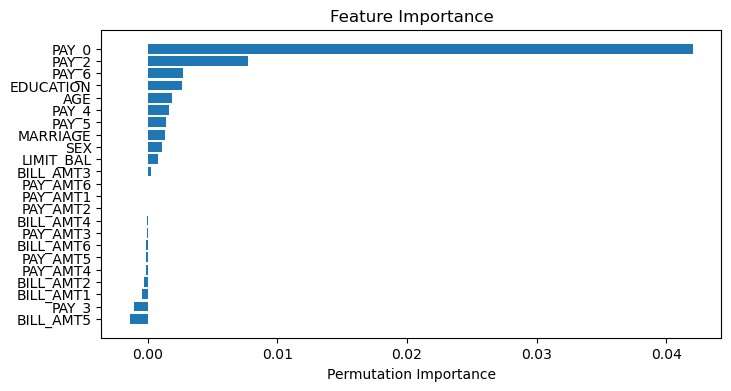

CPU times: user 4min 32s, sys: 1min 39s, total: 6min 12s
Wall time: 43.8 s


In [23]:
%%time
best_knn = grid_search.best_estimator_
best_knn.fit(train_X, train_y)

result = permutation_importance(best_knn, test_X, test_y, n_repeats=10, random_state=42, n_jobs=1)

# Plot feature importance
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(8, 4))
plt.barh(train_X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.savefig('../images/credit-knn/feature-importance.png')
plt.show()

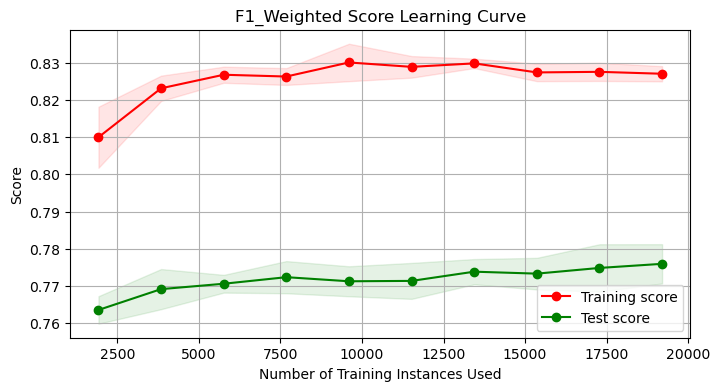

CPU times: user 716 ms, sys: 71.4 ms, total: 788 ms
Wall time: 5.67 s


In [24]:
%%time
best_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, train_X, train_y, cv=5, scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

plt.title('F1_Weighted Score Learning Curve')
plt.xlabel('Number of Training Instances Used')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.savefig('../images/credit-knn/best-nn-training-vs-test-set')
plt.show()

# Write to a text file
with open('../results/credit-knn/test_classification_results.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(test_report + "\n")
    file.write("Confusion Matrix:\n")
    file.write(np.array2string(test_cm) + "\n")

In [25]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)

Time taken: in min 1.6045430520833481
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.5s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.4s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   1.2s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   1.3s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   1.4s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total tim